In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df= pd.read_csv("temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [28]:
df.set_index(['Date'], inplace=True)

In [29]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


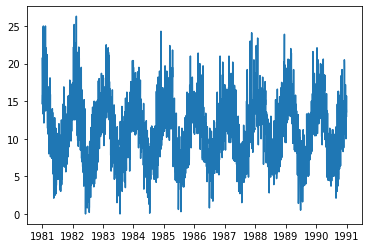

In [31]:
plt.plot(df['Temp'])

In [32]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
adfuller(df['Temp'])

(-4.4448049246117,
 0.0002470826300360994,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '10%': -2.56719413172842,
  '5%': -2.862336767636517},
 16642.822304301197)

In [36]:
df['Seasonality'] = df['Temp'] - df['Temp'].shift(12)

In [38]:
df.head(15)

,Temp,Seasonality
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN
1981-01-06,15.8,NaN
1981-01-07,15.8,NaN
1981-01-08,17.4,NaN
1981-01-09,21.8,NaN


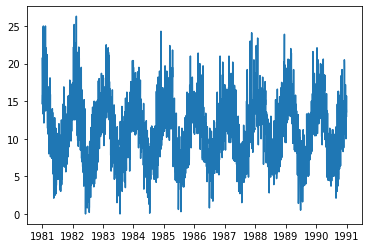

In [54]:
plt.plot(df['Temp'])

In [39]:
adfuller(df['Seasonality'].dropna())

(-9.938406810160819,
 2.7048210175208564e-17,
 30,
 3607,
 {'1%': -3.4321642389337907,
  '10%': -2.5671967199233476,
  '5%': -2.862341629305848},
 17583.096987244804)

In [ ]:
p=8
d=0
q=12

P=2
D=1
Q=4

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

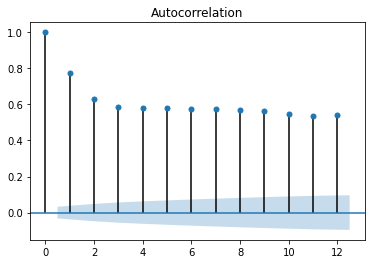

In [41]:
plot_acf(df['Temp'], lags=12)
plt.show()

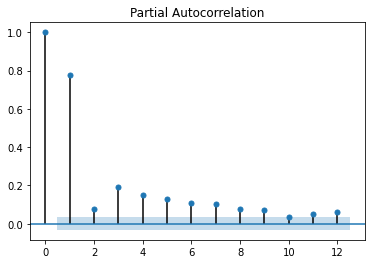

In [43]:
plot_pacf(df['Temp'], lags=12)
plt.show()

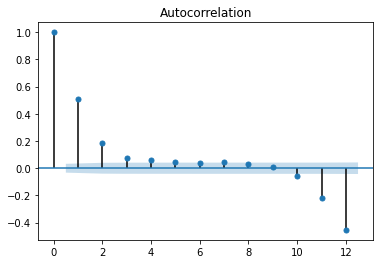

In [45]:
plot_acf(df['Seasonality'].dropna(), lags=12)
plt.show()

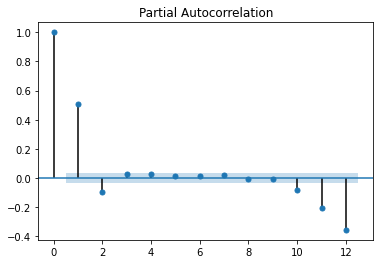

In [46]:
plot_pacf(df['Seasonality'].dropna(), lags=12)
plt.show()

In [ ]:
#p=8
d=0
q=12

P=2
D=1
Q=4

In [51]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.7 MB/s 
     |████████████████████████████████| 9.8 MB 59.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [52]:
import pmdarima as pm
model=pm.auto_arima(df["Temp"],m=1,seasonal=True, start_P=0,start_q=0,max_order=4,test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17245.958, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20611.139, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17265.725, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18554.160, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28436.596, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17113.438, Time=1.51 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17030.851, Time=1.93 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=16970.247, Time=2.36 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=16781.481, Time=8.92 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=16779.598, Time=7.36 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16777.600, Time=5.88 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16831.033, Time=4.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16780.222, Time=7.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16781.136, Time=4.96 sec
 ARIMA(4,0,2)(0,0,0

In [53]:
result=model.summary()
print(result)

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3650
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -8382.800
Date:                Thu, 07 Oct 2021   AIC                          16777.600
Time:                        14:26:50   BIC                          16814.815
Sample:                             0   HQIC                         16790.853
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0562      0.018      3.128      0.002       0.021       0.091
ar.L1          1.4851      0.018     80.342      0.000       1.449       1.521
ar.L2         -0.6204      0.027    -23.368      0.0

In [59]:
df

,Temp,Seasonality
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN
...,...,...
1990-12-27,14.0,0.6
1990-12-28,13.6,0.0
1990-12-29,13.5,-0.4


In [60]:
df1=df.resample('M').mean()

In [64]:
df1.tail(30)

,Temp,Seasonality
Date,,
1988-07-31,8.232258,0.070968
1988-08-31,8.725806,0.232258
1988-09-30,9.883333,0.586667
1988-10-31,10.890323,0.393548
1988-11-30,12.253333,0.493333
1988-12-31,15.436667,0.703333
1989-01-31,15.180645,0.641935
1989-02-28,16.371429,0.103571
1989-03-31,15.803226,-1.209677


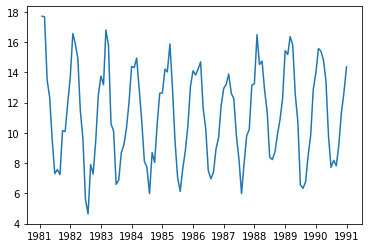

In [62]:
plt.plot(df1['Temp'])

In [67]:
train=df1[(df1.index.get_level_values(0) >="1981-01-31") & (df1.index.get_level_values(0) <="1988-12-31")]
test=df1[(df1.index.get_level_values(0) >="1989-01-31")]

In [68]:
train.shape

(96, 2)

In [69]:
test.shape

(24, 2)

In [70]:
model.fit(train["Temp"])

ARIMA(maxiter=50, method='lbfgs', order=(3, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [74]:
forcast=model.predict(n_periods=24, return_conf_int=True)

In [75]:
forcast

(array([14.54532182, 14.01207147, 12.16777497, 10.34636544,  8.67503034,
         7.74807447,  7.71401145,  8.5803487 , 10.07117282, 11.77514032,
        13.230629  , 14.06252577, 14.07274011, 13.28871736, 11.94684735,
        10.42276502,  9.12660664,  8.3932616 ,  8.39640138,  9.10838557,
        10.31490008, 11.67849953, 12.83243171, 13.47880843]),
 array([[12.18064521, 16.90999844],
        [11.30812808, 16.71601487],
        [ 9.22928265, 15.10626729],
        [ 7.40365806, 13.28907282],
        [ 5.67091653, 11.67914414],
        [ 4.48129346, 11.01485547],
        [ 4.09758429, 11.33043861],
        [ 4.69530947, 12.46538793],
        [ 6.08156832, 14.06077733],
        [ 7.7815753 , 15.76870533],
        [ 9.19600599, 17.26525201],
        [ 9.86833671, 18.25671482],
        [ 9.65302728, 18.49245295],
        [ 8.69195188, 17.88548283],
        [ 7.28039096, 16.61330375],
        [ 5.75398001, 15.09155003],
        [ 4.42853801, 13.82467527],
        [ 3.583222  , 13.2033012 ]

In [76]:
forcast_df=pd.DataFrame(forcast[0],index=test.index,columns=['Prediction'])

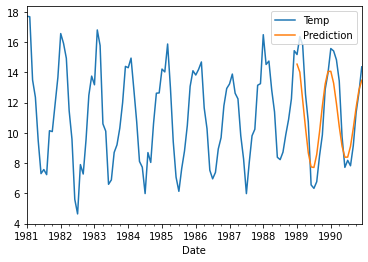

In [78]:
pd.concat([df1['Temp'],forcast_df],axis=1).plot()

In [79]:
forcast1=model.predict(n_periods=24, return_conf_int=True)

In [87]:
df1.tail()

,Temp,Seasonality
Date,,
1990-08-31,7.825806,-0.219355
1990-09-30,9.166667,0.973333
1990-10-31,11.345161,0.967742
1990-11-30,12.656667,-0.226667
1990-12-31,14.367742,0.616129


In [80]:

forcast1

(array([14.54532182, 14.01207147, 12.16777497, 10.34636544,  8.67503034,
         7.74807447,  7.71401145,  8.5803487 , 10.07117282, 11.77514032,
        13.230629  , 14.06252577, 14.07274011, 13.28871736, 11.94684735,
        10.42276502,  9.12660664,  8.3932616 ,  8.39640138,  9.10838557,
        10.31490008, 11.67849953, 12.83243171, 13.47880843]),
 array([[12.18064521, 16.90999844],
        [11.30812808, 16.71601487],
        [ 9.22928265, 15.10626729],
        [ 7.40365806, 13.28907282],
        [ 5.67091653, 11.67914414],
        [ 4.48129346, 11.01485547],
        [ 4.09758429, 11.33043861],
        [ 4.69530947, 12.46538793],
        [ 6.08156832, 14.06077733],
        [ 7.7815753 , 15.76870533],
        [ 9.19600599, 17.26525201],
        [ 9.86833671, 18.25671482],
        [ 9.65302728, 18.49245295],
        [ 8.69195188, 17.88548283],
        [ 7.28039096, 16.61330375],
        [ 5.75398001, 15.09155003],
        [ 4.42853801, 13.82467527],
        [ 3.583222  , 13.2033012 ]

In [91]:
forcast_range=pd.date_range(start='1990-08-31',periods=24,freq='M')

In [92]:
forcast1_df=pd.DataFrame(forcast1[0],index=forcast_range,columns=['Prediction'])

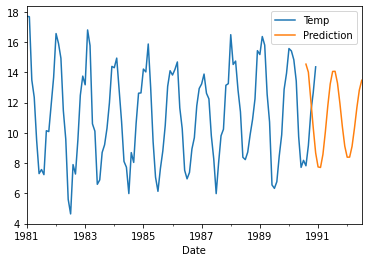

In [93]:
pd.concat([df1['Temp'],forcast1_df],axis=1).plot()